# Logistic Regression

Despite the name, logistic regression is a method used for **classification problems**. Unlike for other classification models, the predicted value is still continuous (and not discrete, i.e. not class 0 or class 1). 

Logistic regression predicts a value between 0 and 1 which corresponds to the **probability of belonging to the positive class**. Like in linear regression, this is done by computing the weighted sum of the input features plus a bias term. 

The important difference is that Logistic regression outputs the logistic of the results, i.e. putting the result in a **sigmoid function**. That way the output is bound between 0 and 1.

A value of 0.42 would mean that a certain observation has a 42% chance of being a positive case and a 58% of being a negative case. Once the value is 0.5 or higher, we would classify the observation as positive. 

(Note: The further away the predicted probability is from the actual one, the higher the cost when fitting the model. See **log loss cost function** for details).

This makes this kind of logistic regression a binary classifier. However, Logistic regression can be used for multi-class problems as well.


### Table of content
- fff
- fff
- fff

## 1. Logistic Regression with one Class and one Feature

In [1]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [37]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
# split data in features and target
# feature: petal width
# target: Iris virginica y/n

import numpy as np
X = iris["data"][:,3:] # petal width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

In [22]:
# Fit logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

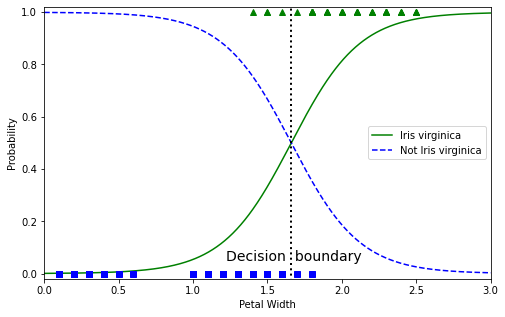

In [47]:
# Plot the model's estimated probabilities as a function of petal width

import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new) # predict probabilities
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # calculate decision boundary

plt.figure(figsize=(8, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.text(decision_boundary+0.02, 0.05, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.legend()
plt.axis([0, 3, -0.02, 1.02])
plt.xlabel("Petal Width")
plt.ylabel("Probability")

Note: In this example, we would have two false positive cases and three false negative cases.

Adding another feature (petal width) might help the classification.

## 2. Logistic Regression with one Class and two Features

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
# split data in features and target
# feature: petal width and petal length
# target: Iris virginica y/n

import numpy as np
X = iris["data"][:,2:] # petal length and width
y = (iris["target"]==2) # select one type of flower for binary prediction
y = y.astype(np.int) # 0 negative, 1 positive class

# Fit logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Petal width')

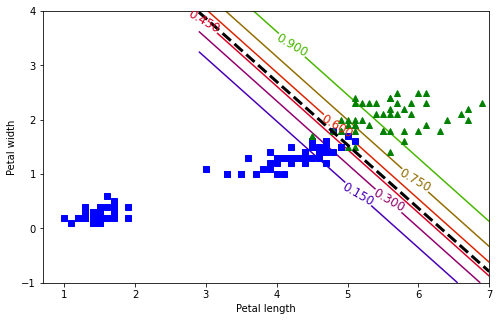

In [99]:
# Plot prediction and decision boundars

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.figure(figsize=(8, 5))

# contour plot
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(-1, 4, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

# observations and their real class
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")


The dashed line is the decision boundary at which the model is indifferent whether the observation is a positive or negative case (p=50%). 
The colored lines represent the model output propabilities, e.g.purple for 15% probability of a positive case, yellow 75%, and green 90% probability. That way the uncertainty is represented visually.

## 3. Logistic Regression as a Binary Classifier - Full Example

## 4. Logistic Regression with Multiple Classes and Multiple Binary Classifiers